In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io, os, re, nbformat, json, sys 
import zipcodes as code 
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn import metrics 
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import ComplementNB
from sklearn.neighbors import KNeighborsClassifier 
from warnings import filterwarnings
filterwarnings("ignore")
Data = pd.read_csv("BankPersonalLoan.csv" )
df = pd.DataFrame(Data)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [2]:
df['Experience'] = abs(df['Experience'])
df["CCAvg"] = df["CCAvg"]*12

In [3]:
df.drop('ID', axis =1 ,inplace=True)
df['ZIP Code'].nunique()


467

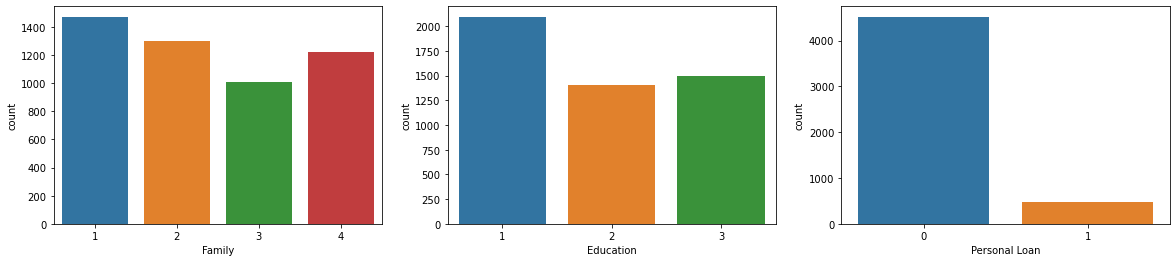

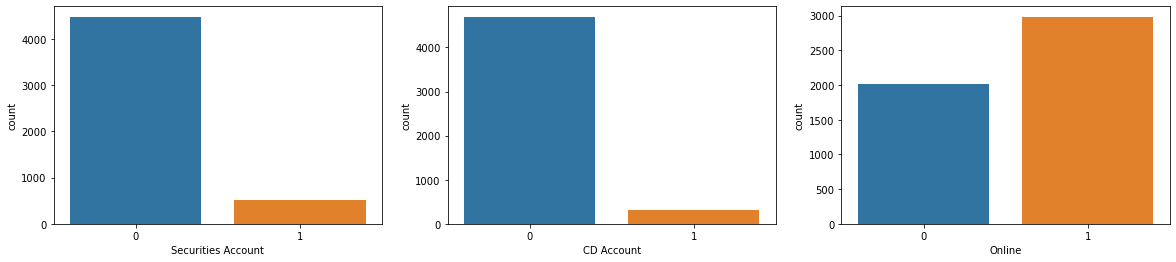

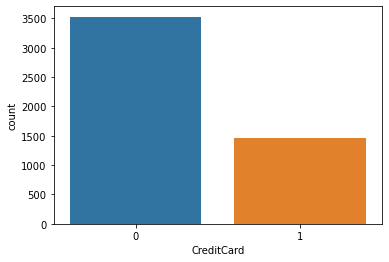

In [4]:
Categorical = ['Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
i= 0
while i<8:
    fig = plt.figure(figsize = [20,4])
    plt.subplot(1,3, 1)
    sns.countplot(x = Categorical[i], data=df)
    i+=1
    if i==7:
        break
    plt.subplot(1, 3,2) 
    sns.countplot(x=Categorical[i], data= df) 
    i+=1
    plt.subplot(1,3, 3)
    sns.countplot(x =Categorical[i], data=df)
    i+=1
    plt.show()

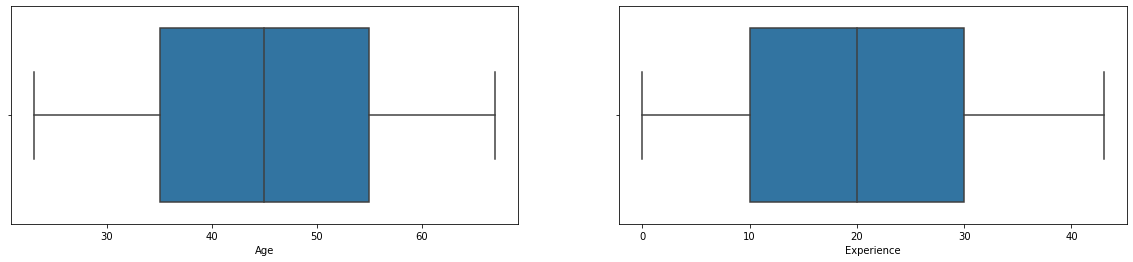

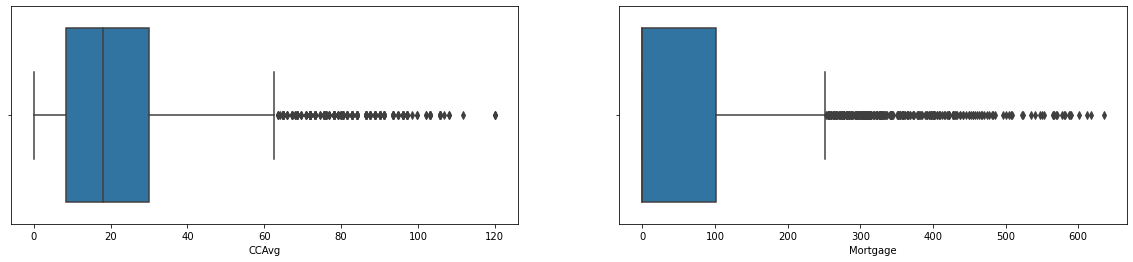

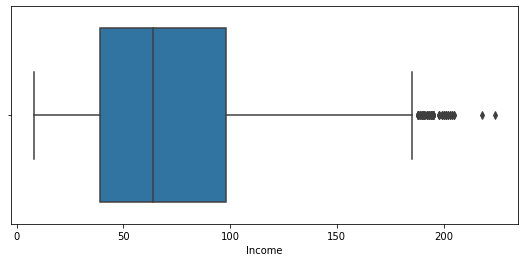

In [5]:
Numerical = ['Age', 'Experience', 'CCAvg', 'Mortgage', 'Income']
i=0
while i<6:
    fig = plt. figure (figsize=[20,4])
    plt.subplot(1,2, 1)
    sns.boxplot(x = Numerical[i], data= df) # read each one, fron Data
    i += 1
    if i==5:
        break
    plt.subplot(1,2, 2)
    sns.boxplot(x = Numerical[i], data= df)
    i += 1
    plt.show()

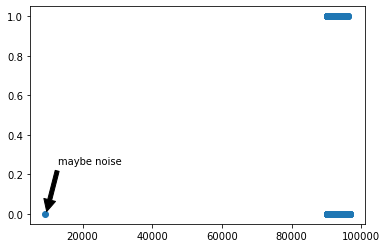

In [6]:
plt.scatter(df['ZIP Code'],df['Personal Loan'])
plt.annotate('maybe noise', xy=(9500, 0), xytext= (13000, .25) , arrowprops =dict(facecolor='black', shrink=0.05)) 
plt.show()

In [7]:
Noise_Zip = df[df['ZIP Code']<20000]
Noise_Zip
df.drop(index=384, inplace=True)
list_zipcode=list(df['ZIP Code'])

In [9]:
import zipcodes as zcode
country=[] #To place countries
lat=[] #To latitude of each sample
long=[] #To longitude of each sample 
for x in list_zipcode: #This 100p check each value of ZIP Code
    my_city_county = zcode.matching(str(x)) #Used as zipcode library
    if len(my_city_county) ==1:#There is information for this zip code if the value is one
        County =my_city_county[0].get('county')
        Lat=my_city_county[0].get('lat')
        Long =my_city_county[0].get('long')
    else: #When there aren't any information for this zip code
        County="Notfound"
        Lat=np.NaN
        Long=np.NaN
    country.insert(0, County) #Insert to end of list
    lat.insert(0,Lat) #Insert to end of list
    long.insert(0,Long) #Insert to end of list
country.reverse() #Revarse list country
lat.reverse()
long.reverse() 
df["Place"] =country 
df["Latitude"]=lat
df["Longitude"] =long


In [10]:
#Check to make sure about function
print(zcode.matching(str(92612))) #This zip code for the end sample
df.describe(include='all')
df=df.astype({"Latitude":float, "Longitude":float})    #change type
df.describe(include="all")
df[df['Place']=="Not found"]['ZIP Code'].value_counts()


[{'zip_code': '92612', 'zip_code_type': 'STANDARD', 'active': True, 'city': 'Irvine', 'acceptable_cities': [], 'unacceptable_cities': [], 'state': 'CA', 'county': 'Orange County', 'timezone': 'America/Los_Angeles', 'area_codes': ['714', '949'], 'world_region': 'NA', 'country': 'US', 'lat': '33.6615', 'long': '-117.8217'}]


Series([], Name: ZIP Code, dtype: int64)

In [11]:
def highlight_cols(s):
    color = 'yellow'
    return 'background-color: %s' % color

z_92717=list(df[df["ZIP Code"]==92717].index)
for x in z_92717:
    df["Place"].loc[x]='Irvine'
    df["Latitude"].loc[x]=33.6462
    df["Longitude"].loc[x]=-117.8398
df[df["ZIP Code"]==92717].style.applymap(highlight_cols, subset=pd.IndexSlice[:,['Personal Loan']])
   

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Place,Latitude,Longitude
106,43,17,69,92717,4,34.800000,1,0,0,0,0,1,1,Irvine,33.646200,-117.839800
172,38,13,171,92717,2,93.600000,1,0,0,0,0,1,0,Irvine,33.646200,-117.839800
184,52,26,63,92717,2,18.000000,2,0,0,1,0,1,0,Irvine,33.646200,-117.839800
321,44,20,101,92717,3,52.800000,2,82,1,0,0,0,0,Irvine,33.646200,-117.839800
366,50,24,35,92717,1,3.600000,3,0,0,0,0,1,0,Irvine,33.646200,-117.839800
476,60,34,53,92717,1,9.600000,2,0,0,1,0,0,1,Irvine,33.646200,-117.839800
695,29,4,115,92717,1,22.800000,1,0,0,0,0,0,0,Irvine,33.646200,-117.839800
721,49,24,39,92717,1,16.800000,3,0,0,0,0,1,0,Irvine,33.646200,-117.839800
1099,30,6,52,92717,3,8.400000,2,0,0,0,0,1,0,Irvine,33.646200,-117.839800
1189,42,17,115,92717,2,4.800000,1,0,0,0,0,1,0,Irvine,33.646200,-117.839800


In [12]:
z_96651=list(df[df["ZIP Code"]==96651].index)
for x in z_96651:
    df["Place"].loc[x]= 'Rudno nad Hronom'
    df["Latitude"].loc[x]=48.4242
    df["Longitude"].loc[x]=18.7071
df[df["ZIP Code"]== 96651].style.applymap(highlight_cols, subset= pd.IndexSlice[:, ['Personal Loan']])    


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Place,Latitude,Longitude
630,32,7,35,96651,3,15.600000,1,108,0,0,0,0,1,Rudno nad Hronom,48.424200,18.707100
672,51,27,23,96651,1,2.400000,1,0,0,0,0,1,0,Rudno nad Hronom,48.424200,18.707100
1426,37,11,60,96651,3,6.000000,3,0,0,0,0,1,0,Rudno nad Hronom,48.424200,18.707100
1653,26,1,24,96651,2,10.800000,3,123,0,0,0,0,1,Rudno nad Hronom,48.424200,18.707100
2731,29,5,28,96651,1,2.400000,3,0,0,0,0,1,0,Rudno nad Hronom,48.424200,18.707100
3525,59,34,13,96651,4,10.800000,2,0,0,0,0,0,0,Rudno nad Hronom,48.424200,18.707100


In [13]:
z_92634=list(df[df["ZIP Code"]==92634].index)
for x in z_92634:
    df["Place"].loc[x]= 'Fullerton'
    df["Latitude"].loc[x]=33.8739
    df["Longitude"].loc[x]=117.9028
    
df[df["ZIP Code"]== 92634].style.applymap(highlight_cols, subset= pd.IndexSlice[:, ['Personal Loan']])


,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Place,Latitude,Longitude
468,34,10,21,92634,1,6.000000,3,0,0,0,0,1,0,Fullerton,33.873900,117.902800
780,32,7,42,92634,4,9.600000,1,0,0,0,0,1,1,Fullerton,33.873900,117.902800
2218,38,13,9,92634,2,3.600000,2,0,0,0,0,0,0,Fullerton,33.873900,117.902800
3887,24,2,118,92634,2,86.400000,1,0,0,1,0,1,0,Fullerton,33.873900,117.902800
4392,52,27,81,92634,4,45.600000,2,0,0,0,0,0,0,Fullerton,33.873900,117.902800


In [38]:
df["Personal Loan"].value_counts()

0    4519
1     480
Name: Personal Loan, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

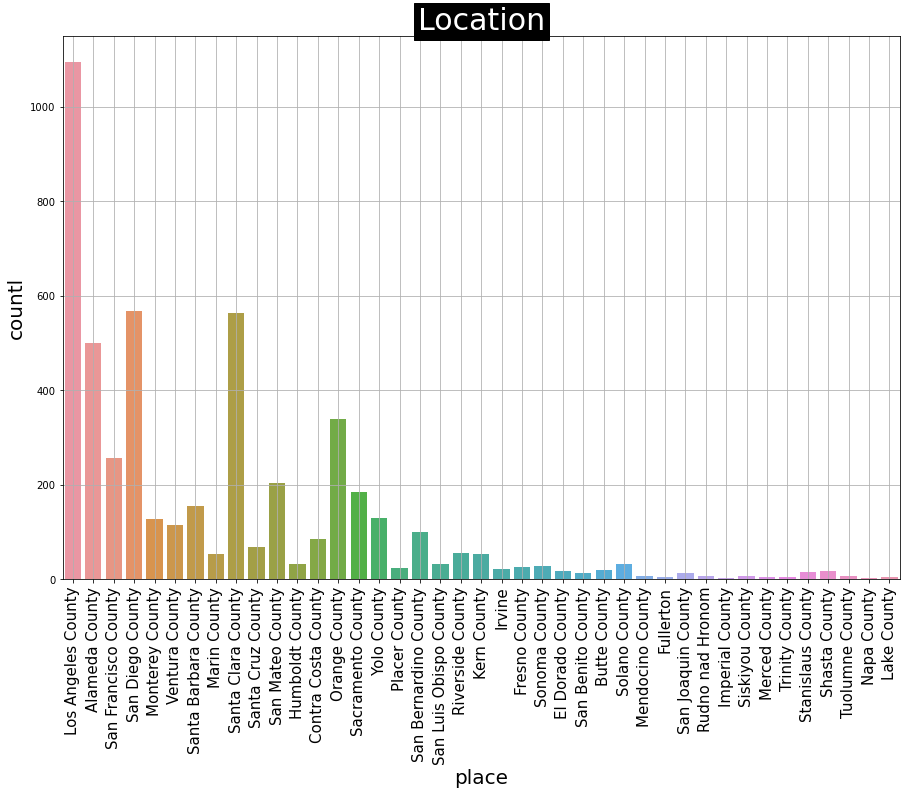

In [15]:
plt.figure(figsize= (15,10))
sns.countplot(x="Place", data=df)
#Count sample for each place
plt.title('Location', fontsize=30, backgroundcolor='black', c='white') 
plt.grid() #Liner
plt.xticks(rotation=90, fontsize=15) #Xticks
plt.xlabel("place",fontsize=20)
plt.ylabel("countl", fontsize=20)
plt.show

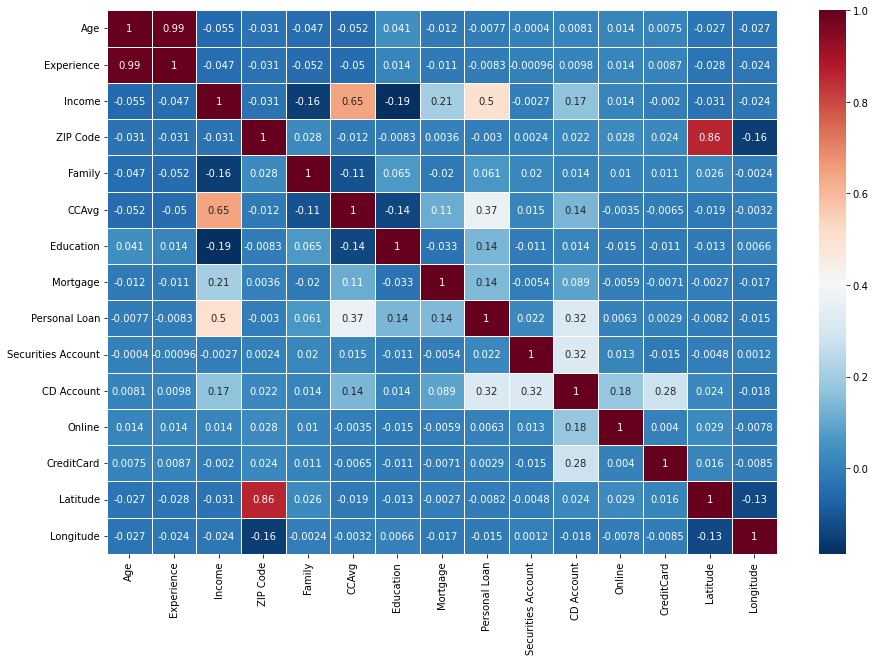

In [16]:
ax = plt.subplots(figsize = (15, 10)) #Size of plot
sns.heatmap(df.corr(), cmap='RdBu_r', cbar=True, annot=True,linewidths=0.5) #Plot heatmap
plt.show()


(array([10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

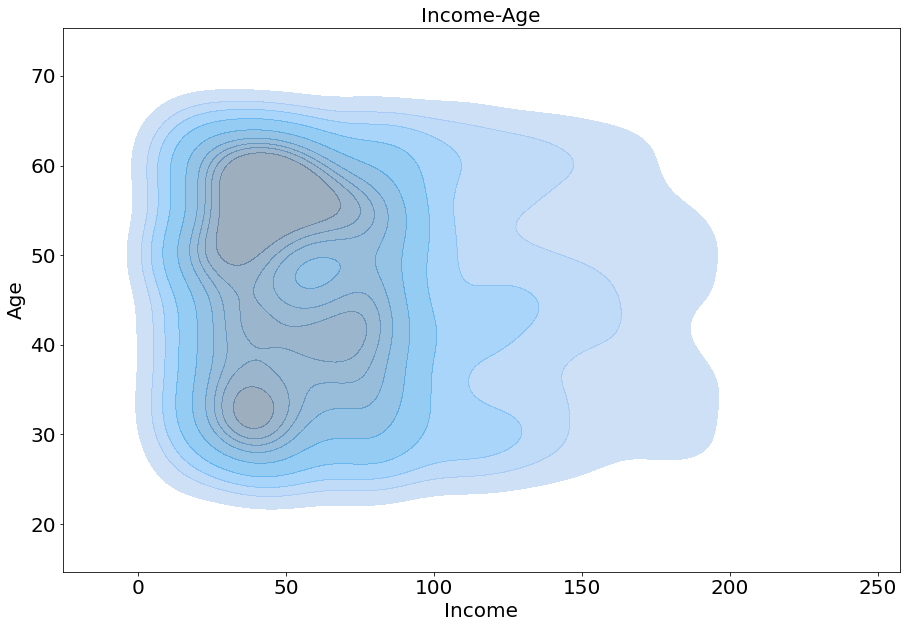

In [157]:
plt.figure (figsize=(15,10))
sns.kdeplot(df['Income'],df['Age'] ,, hue= "Personal Loan", shade=True, fill= True, commom_norm= False, palette="crest" 
            ,alpha=.5, linewidth=0)
plt.title("Income-Age", fontsize=20)
plt.xlabel("Income",fontsize=20)
plt.ylabel("Age",fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)


In [18]:
x= pd.DataFrame(df,columns=['Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard','Latitude','Longitude'])
y = df['Personal Loan']
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2 , random_state = 0)

In [19]:
logreg = LogisticRegression(solver='liblinear', C=50)
logreg.fit(x_train, y_train.ravel())
y_pred = logreg.predict(x_test)
print('fl score :', metrics.f1_score(y_test, y_pred))

fl score : 0.3142857142857143


In [20]:
def Replace(dataframe):
    dataframe = df.copy()
    dataframe ['Education' ].replace([1, 2,3], [4,5,6], inplace=True)
    dataframe['Securities Account'].replace( [1,2], [3, 4], inplace=True)
    dataframe['CD Account'].replace( [1,2], [3,4], inplace=True)
    dataframe['Online'].replace( [1, 2], [3, 4], inplace=True) 
    dataframe['CreditCard'].replace( [1,2], [3,4], inplace=True)
    return(dataframe)

In [21]:
 #function take data and test size next get x train, x test, y train, y test 
def Logreg(x, y, Testsize):
    df_evaluation=pd.DataFrame()
    for i in Testsize:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=0)
        logreg = LogisticRegression(solver="liblinear", class_weight= 'balanced')
        logreg.fit(x_train, y_train)
        y_pred = logreg.predict(x_test)
        dict = {'Test_size': i, 'acc': metrics.accuracy_score(y_test, y_pred), "score" : logreg.score(x,y)}
        df_evaluation=df_evaluation.append(dict, ignore_index = True)
    return (x_train,x_test, y_train, y_test, y_pred, df_evaluation)
#This function highlights Maximum 
def highlight_max(s) :
    is_max = s== s.max()
    return ['background-color: yellow' if v else '' for v in is_max]


In [22]:
i=[0.1, 0.15, 0.2, 0.25,0.3]
df_r = Replace(df)
x= pd.DataFrame(df_r,columns=['Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard','Latitude','Longitude'])
y = df_r['Personal Loan']
x_train, x_test, y_train, y_test, y_pred, df_evaluation =Logreg(x,y, i)
df_evaluation.style.apply(highlight_max)

,Test_size,acc,score
0,0.100000,0.898000,0.896179
1,0.150000,0.901333,0.896179
2,0.200000,0.909000,0.895179
3,0.250000,0.903200,0.892979
4,0.300000,0.898000,0.896179


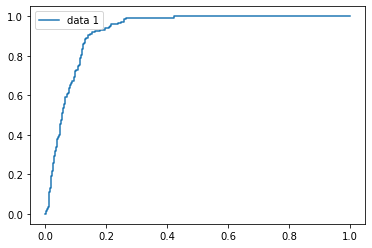

array([[1217,  136],
       [  17,  130]], dtype=int64)

In [24]:
y_pred_proba = logreg.predict_proba(x_test)[::,1]
fpr, tpr,_ = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="data 1")
plt.legend(loc='best')
plt.show()


confusion_matrix (y_test, y_pred)


In [25]:
#solvers = ['newton-cg','liblinear', 'bfgs', 'sag', 'saga']

def Logreg(x, y, Testsize):
    df_evaluation=pd.DataFrame()
    for i in Testsize:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=0)
        logreg = LogisticRegression(solver="newton-cg", class_weight= 'balanced')
        logreg.fit(x_train, y_train)
        y_pred = logreg.predict(x_test)
        dict = {'Test_size': i, 'acc': metrics.accuracy_score(y_test, y_pred), "score" : logreg.score(x,y)}
        df_evaluation=df_evaluation.append(dict, ignore_index = True)
    return (x_train,x_test, y_train, y_test, y_pred, df_evaluation)
#This function highlights Maximum 
def highlight_max(s) :
    is_max = s== s.max()
    return ['background-color: yellow' if v else '' for v in is_max]


In [26]:
i=[0.1, 0.15, 0.2, 0.25,0.3]
df_r = Replace(df)
x= pd.DataFrame(df_r,columns=['Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard','Latitude','Longitude'])
y = df_r['Personal Loan']
x_train, x_test, y_train, y_test, y_pred, df_evaluation =Logreg(x,y, i)
df_evaluation.style.apply(highlight_max)

,Test_size,acc,score
0,0.100000,0.906000,0.898180
1,0.150000,0.906667,0.898980
2,0.200000,0.915000,0.896579
3,0.250000,0.906400,0.894379
4,0.300000,0.903333,0.899980


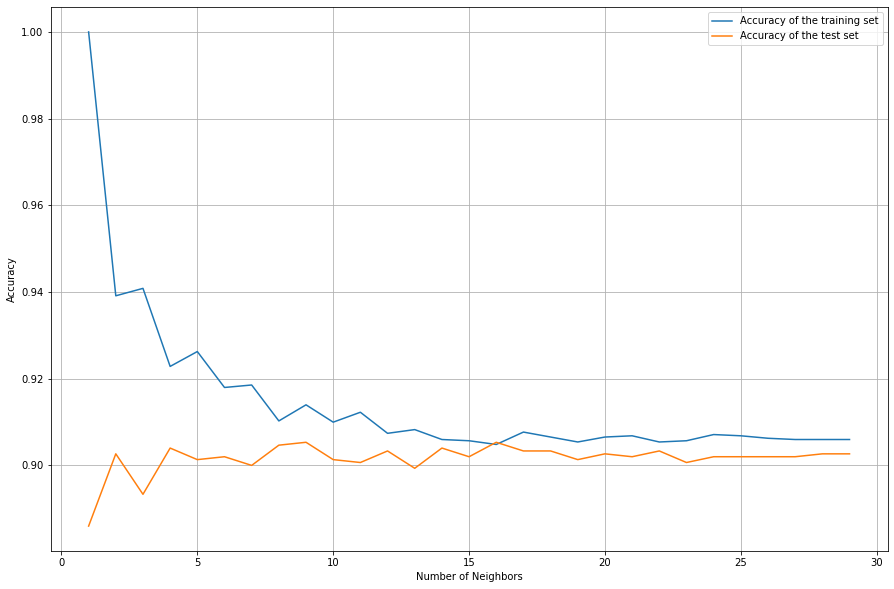

In [29]:
#KNN

training_acc =[]
test_acc =[]
neighbors_setting = range(1,30)
for n_neighbors in neighbors_setting:
    knn_model = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn_model.fit(x_train, y_train.ravel()) 
    training_acc.append(knn_model.score(x_train, y_train)) 
    test_acc.append(knn_model.score(x_test, y_test))
plt.figure(figsize=(15,10))
plt.plot(neighbors_setting , training_acc, label = "Accuracy of the training set")
plt.plot(neighbors_setting , test_acc, label = "Accuracy of the test set" )
plt.ylabel('Accuracy')
plt.xlabel('Number of Neighbors')
plt.grid()
plt.legend()


In [33]:
print(np.max(training_acc))
print (np.max(test_acc))

1.0
0.9053333333333333


In [34]:
knn_model =KNeighborsClassifier(9)
knn_model.fit(x_train,y_train.ravel())
y_pred =knn_model.predict(x_test)
print("Accuracy for knn:", metrics.accuracy_score(y_test,y_pred) )


Accuracy for knn: 0.903


In [35]:
confusion_matrix(y_test, y_pred)

array([[887,  12],
       [ 85,  16]], dtype=int64)

In [37]:
####Nive Bayes
##Complement
x= pd.DataFrame(df,columns=['Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage','Securities Account','CD Account','Online','CreditCard','Latitude'])
y = df['Personal Loan']
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.2 , random_state = 0)

clf = ComplementNB()
clf.fit(x_train,y_train. ravel())
y_pred =clf.predict(x_test)
print ('accuracy is:' ,metrics.accuracy_score(y_test, y_pred))



accuracy is: 0.794
